<a href="https://colab.research.google.com/github/hjae0520/class2022Spring/blob/main/sound_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [3]:
# generate sample ticks
nSamp = sr * dur                    # 총 5000개의 틱, 0.5에 해당하는 틱은 5000번째 틱
samples = np.arange(1, nSamp+1)     # arange: 1부터 5001-1까지

In [4]:
# convert sample to time (sec)    sample tick -> time tick
t = samples/sr            # 1/10000, 2/10000, ... , 5000/10000

In [5]:
# convert time to angle (radian)    time tick to angle tick
theta0 = t * 2*np.pi * freq         # sine이란 함수에는 radian이 입력값, 주기 한 번 돌면 2파이, freq = 100일때, 맨 마지막 주기의 각도는 2파이 x 100 (2파이 x freq x 1)
                                    # duration = 0.5니까 2pi x freq x dur = 2pi x 50이 마지막 주기, duration 대신 t을 대입하면 모든 주기에 해당하는 파이값을 구할 수 있음

In [9]:
len (samples) # 시험문제, tick들을 바꿔주는 것일 뿐, 전체 개수는 변하지 않음
len (theta0)

5000

In [6]:
# shift angle by phase
theta = theta0 + phase

In [10]:
# generate signal by sin-phasor: np.sin(angle)
s = amp * np.sin(theta)       

Text(0, 0.5, 'real')

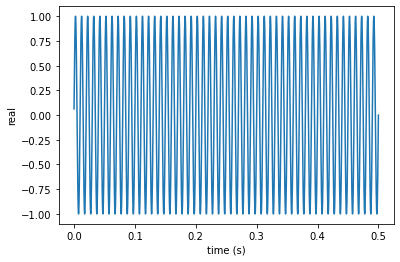

In [13]:
# plot the entire signal
plt.plot(t, s, ':')     # t자리는 theta로 바꿔도 무방하다
plt.xlabel('time (s)')
plt.ylabel('real')

Text(0, 0.5, 'real')

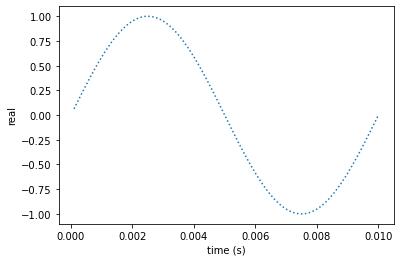

In [14]:
# plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [15]:
ipd.Audio(s, rate=10000) # sr

In [16]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)
sin () theta 대신 e^i*theta를 대입할 수 있다 -> 입체적인 사인함수가 만들어짐
np.exp(theta*1j) => 복소수를 만들어 냄 (a+bj)
실수부(a)와 허수부(b)가 각각 축(real, imag)을 만들어 냄
이 축으로 만들어진 2차원 평면에 (a, b)로 점을 찍을 수 있다.
시간이 흐르면서 여러 평면이 만들어지는데 이를 표현한 것이 밑에 있는 그래프
실수와 시간의 관계는 코사인
허수와 시간의 관계는 사인
-> 기존 sin-phasor보다 advanced되었다는 이유 (사인과 코사인 둘 다 포함)

In [17]:
# parameter setting
amp = 1          # range [0.0, 1.0] 
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [18]:
# generate samples
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [19]:
# convert samples to time
t = samples/sr

In [20]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [21]:
# shift angle by phase
theta = theta0 + phase

In [22]:
# generate signal by complex-phasor       sin함수 대신 np.exp = e, 1j = 허수 / np.exp(theta*1j) = e^j*theta
c = amp * np.exp(theta*1j)

In [ ]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain of signals 
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c, rate=sr) # c.imag -> 허수부분만

In [29]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [31]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.imag, rate=sr)  # 사인과 코사인의 소리는 차이 나지 않음